# Trabajo Práctico 1: Técnicas de Diseño
El presente trabajo busca evaluar el desarrollo y análisis de algoritmos de las primeras técnicas de diseño vistas en la materia.
La primera fecha de entrega del TP será el 01/05/23, mientras que la segunda fecha de entrega (con reducción de nota) será
el 12/05/23.

## Primera Parte: Problema de K-merge por División y Conquista
### Introducción
El problema de K-merge es el siguiente: se tienen K arreglos ordenados, y se quiere quiere obtener un único arreglo, también
ordenado, con todos los elementos de los arreglos originales (inclusive si hay repetidos). Por simplicidad para los diferentes
análisis se puede suponer que todos los arreglos tienen exactamente h elementos (por ende, la cantidad total de elementos es
n = K ∗ h).
Para resolver este problema, es posible que hayan visto en Algoritmos y Programación II un algoritmo que resuelve este
problema utilizando un Heap. Nos referiremos a este como el algoritmo que utiliza Heaps.
La idea en este caso será plantear otra solución y analizarla. Se propone el siguiente algoritmo por división y conquista, con
semejanzas a mergesort.
1. Caso base: cuando quede un único arreglo, simplemente devolver dicho arreglo.
2. En el caso general, dividir la cantidad de arreglos entre la primera mitad, y la segunda mitad, y luego invocar
recursivamente para cada mitad de arreglos. Es decir, si tenemos cuatro arreglos, invocamos para los primeros 2, y
luego para los segundos 2. Al terminar los llamados recursivos, tenemos dos arreglos ordenados. Estos deberán ser
intercalados ordenadamente, tal cual se realiza en mergesort.


### Consigna
1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.
2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.
3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.
4. En caso que la complejidad obtenida en el punto 1 no se condiga con la realidad, indicar por qué (qué condición falla).
En dicho caso, se requiere llegar a la complejidad correcta (no solamente enunciarla, sino demostrar cuál es).
5. Indicar cualquier conclusión adicional que les parezca relevante en base a lo analizado.

1. Determinar, utilizando el Teorema Maestro, cuál sería la complejidad del algoritmo propuesto.

El Teorema Maestro tiene la siguiente fórmula: 

T(n) = AT(n/B) + f(n)

Donde:

A -> cantidad de llamadas recursivas (con A natural)

B -> proporción del tamaño original con el que llamamos recursivamente (con B real mayor a 1 y cte)

f(n) -> costo del trabajo que hacemos en cada llamada recursiva

En este caso tenemos:
$$
\newline
A = 2
\newline
B = 2
\newline
f(n) = O(n^C)\; donde\; C = 1
\newline
log_B(A) = log_2(2) = 1 \rightarrow como\;  log_B(A) = C \rightarrow  O(n^c * log(n)) = O(n log(n))
$$
Siendo n = K ∗ h, con K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

2. Describir el algoritmo que utiliza heaps, y determinar su complejidad.

El algoritmo que utiliza heaps es el siguiente:

  1. Agregar a un heap el primer elemento de cada uno de los arrays junto con su índice y el índice del array al que pertenece.

  2. Mientras que el heap no esté vacío:
  
      a. Tomar el primer elemento del heap y agregar el valor al resultado.

      b. Si el índice del elemento tomado es menor al tamaño del array al que pertenece, agregar el siguiente elemento del array al heap junto con su índice y el índice del array al que pertenece.

  3. Devolver el resultado.

$$
1\; -> O(K)
\newline
2\; -> K * h\;  veces
\newline
  a\; -> O(log(K))
\newline
  b\; -> O(log(K))
\newline
O(K) + K * h * O(log(K))\; -> O(K + K * h * log(K))
\newline
K << K * h * log(K),\; entonces\; se\; desprecia\; K\; y\; queda\; O(K * h * log(K))

$$

Siendo K la cantidad de arreglos y h la cantidad de elementos de cada arreglo.

Se puede ver que la complejidad para el algoritmo que utiliza heaps es O(K * h * log(K)), mientras que para el algoritmo de división y conquista es O(K * h * log(K*h)). Por lo tanto, el algoritmo que utiliza heaps es más eficiente y se puede notar al variar h.

3. Implementar ambos algoritmos, y hacer mediciones (y gráficos) que permitan entender si las complejidades obtenidas
para cada uno se condicen con la realidad.

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from heapq import heappush, heappop

def heap_mergeK_ordenados(arrays):
    resultado = []
    heap = []

    for i in range(len(arrays)):
        heappush(heap, (arrays[i][0], i, 0))
    
    while heap:
        valor, array_indice, valor_indice = heappop(heap)
        resultado.append(valor)
        if valor_indice + 1 < len(arrays[array_indice]):
            heappush(heap, (arrays[array_indice][valor_indice + 1], array_indice, valor_indice + 1))
        
    return resultado


arrays = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

resultado = heap_mergeK_ordenados(arrays)
print(f"Lista ordenada: {resultado}")
print(f"¿Está ordenada?: {resultado == sorted(resultado)}")

Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [3]:
def merge(array1, array2):
    mergeado = []
    
    i = 0
    j = 0
    while i < len(array1) and j < len(array2):
        if array1[i] < array2[j]:
            mergeado.append(array1[i])
            i += 1
        else:
            mergeado.append(array2[j])
            j += 1
        
    mergeado.extend(array1[i:])    
    mergeado.extend(array2[j:])

    return mergeado
     
def _dyc_mergeK_ordenados(arrays, inicio, fin):
    if inicio == fin:
        return arrays[inicio]
        
    medio = (inicio + fin) // 2
    izquierda = _dyc_mergeK_ordenados(arrays, inicio, medio)
    derecha = _dyc_mergeK_ordenados(arrays, medio + 1, fin)
    return merge(izquierda, derecha)

def dyc_mergeK_ordenados(arrays):
    return _dyc_mergeK_ordenados(arrays, 0, len(arrays) - 1)

arrays = [
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
    [5, 6,  8,  16, 17, 18, 19],
    [3, 7,  12, 13, 20, 21, 22],
    [1, 10, 11, 15, 23, 24, 25],
    [2, 4,  9,  14, 26, 27, 28],
]

resultado = dyc_mergeK_ordenados(arrays)
print(f"Lista ordenada: {resultado}")
print(f"¿Está ordenada?: {resultado == sorted(resultado)}")


Lista ordenada: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28]
¿Está ordenada?: True


In [4]:
import random
from time import time
from matplotlib import pyplot as plt

def generar_arrays(k, h):
    arrays = [[random.randint(0, k*h) for _ in range(h)] for _ in range(k)]
    for array in arrays:
        array.sort()
    return arrays

def generar_array_arrays(k_inicial, h_inicial, variacion_k, variacion_h, cantidad):
    k = k_inicial
    h = h_inicial
    arrays = []
    for _ in range(cantidad):
        arrays.append(generar_arrays(k, h))
        k += variacion_k
        h += variacion_h
    return arrays

In [5]:
def calcular_tiempo_kfijo(funcion, array_arrays):
    tiempos = {}
    for array in array_arrays:
        h = len(array[0])  
        comienzo = time()
        _ = funcion(array)
        final = time()
        tiempos[h] = final - comienzo
    return tiempos

def calcular_tiempo_hfijo(funcion, array_arrays):
    tiempos = {}
    for array in array_arrays:
        k = len(array)  
        comienzo = time()
        _ = funcion(array)
        final = time()
        tiempos[k] = final - comienzo
    return tiempos

Hacemos dos gráficos, uno variando h y otro k, para ver bien la complejidad de cada algoritmo en la práctica.

In [6]:
array_arrays = generar_array_arrays(5, 10, 5, 0, 500)
tiempos_heap = calcular_tiempo_hfijo(heap_mergeK_ordenados, array_arrays) 
tiempos_dyc = calcular_tiempo_hfijo(dyc_mergeK_ordenados, array_arrays)

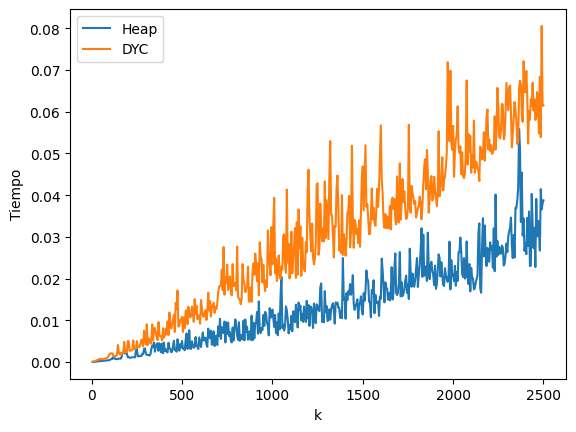

In [7]:
plt.plot(tiempos_heap.keys(), tiempos_heap.values(), label='Heap')
plt.plot(tiempos_dyc.keys(), tiempos_dyc.values(), label='DYC')
plt.xlabel('k')
plt.ylabel('Tiempo')
plt.legend()
plt.show()

Se ve que el algoritmo de división y conquista es menos eficiente que el algoritmo que utiliza heaps, pero no hay una diferencia en la _forma_ de la curva sino que simplemente puede deberse a una constante afectando al orden de complejidad.

In [8]:
array_arrays = generar_array_arrays(5, 10, 0, 5, 2500)
tiempos_heap = calcular_tiempo_kfijo(heap_mergeK_ordenados, array_arrays)
tiempos_dyc = calcular_tiempo_kfijo(dyc_mergeK_ordenados, array_arrays)

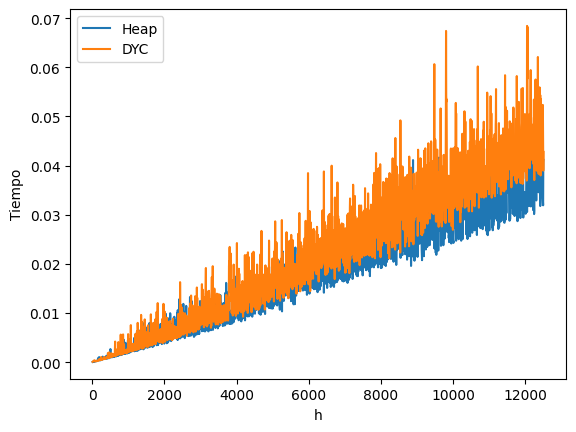

In [9]:
plt.plot(tiempos_heap.keys(), tiempos_heap.values(), label='Heap')
plt.plot(tiempos_dyc.keys(), tiempos_dyc.values(), label='DYC')
plt.xlabel('h')
plt.ylabel('Tiempo')
plt.legend()
plt.show()

Se puede observar que no hay variación, lo que no tiene mucho sentido con las complejidades calculadas ya que debía haber una diferencia notable al variar h.  
Analizando la complejidad del algoritmo de división y conquista, O(K * h * log(Kh)), se puede ver que O(Kh) se debe a la complejidad de cada llamado recursivo, y O(log(Kh)) se debe a la altura del árbol de recursión. Pero en realidad quien incide en la altura del árbol es K, por eso no se nota la diferencia al variar h.

De esta forma, podemos ver que la complejidad del algoritmo por división y conquista calculada con el Teorema Maestro no se condice con la realidad.

Verificando las condiciones para poder aplicar el Teorema Maestro:

1. A debe ser un número natural
2. B debe ser un número real mayor a 1 y constante
3. El caso base debe ser constante

- Respecto a la condición 1, A = 2 siempre, por lo que se cumple.
- Respecto a la condición 2, k siempre se divide por 2, por lo que se va a cumplir siempre que h sea igual para todos los arreglos. En caso de que h sea distinto para cada arreglo, B no sería constante y no se cumpliría la condición. (Debido a que en la consigna se aclara que h es igual para todos los arreglos, se puede asumir que se cumple la condición)
- Respecto a la condición 3, el caso base es cuando queda un único arreglo devolverlo, por lo que al variar h va a variar en complejidad dicho caso base. Por lo tanto, el caso base no es constante y no se cumple la condición.

Ahora, para calcular la complejidad del algoritmo por división y conquista volvemos a analizarlo. Para esto, vamos a mostrar el siguiente ejemplo de árbol de recursión:

<p align="center">
  <img width="700" height="400" src="images/merge-ab.png">
</p>

Se puede ver que cada nodo representa un mergeo de dos arreglos y todos los mergeos de un nivel en conjunto tienen una complejidad O(k*h), siendo k la cantidad de arreglos y h la cantidad de elementos de cada arreglo. Además, el árbol de recursión tiene una altura de log(k), por lo que la complejidad total del algoritmo es O(k * h * log(k)).

## Segunda Parte: ¡Problema de contrabando!
#### Historia y Estado de la situación
Genovia y Krakozhia son países limítrofes muy disímiles. Entre sus muchas diferencias, se encuentran los productos que se
pueden producir o ingresar a uno y otro país. En particular, Krakozhia pertenece a la Unión Europea, haciendo que sea muy
restrictiva con algunas clases de productos1
.

Por el contrario, el Reino de Genovia casi no tiene restricciones ni en el acceso ni en la producción de productos. Este es uno
de los problemas que tienen con sus vecinos de la Unión Europea (el otro, es ser considerando un paraíso fiscal).
Es muy común que ciudadanos de Krakozhia viajen a Genovia, y aprovechen su estadía para comprar productos que no
podrían comprar en su país. Incluso hay quienes aprovechan para comprar bastantes productos, para luego revenderlos
en Krakozhia, a un alto precio. ¿El problema? es ilegal entrar con esos productos a la Unión Europea, y en particular a
Krakozhia, por lo que sus agentes aduaneros deberían confiscarles los productos (y potencialmente labrarles un acta o algún
otro tipo de sansión). ¿Lo bueno? Los agentes aduaneros de Krakozhia no destacan por su honestidad. El menos corrupto no
puede armar una declaración jurada de ingresos medianamente creíble. Esto quiere decir que al pasar por la aduana, un
agente aduanero puede pedir, en concepto de soborno, una cierta cantidad de algunos productos que se lleve consigo (luego de
revisarlos), el cual debe pagarse sí o sí, si no se quiere caer en serios problemas.
Planteo del problema
Queremos pasar mercadería de contrabando de Genovia a Krakozhia. La mercadería viene en paquetes que no podemos abrir.
Cada paquete i trae Xi unidades de un determinado tipo de producto j. Podríamos llegar a tener varios paquetes del mismo
tipo de producto j, incluso con diferente cantidad de unidades. También podemos tener diferentes paquetes de diferentes
productos. Es decir, cada paquete (in-abrible) es de una cantidad específica de un tipo específico, y en total para un tipo
específico j tenemos la suma de Xi unidades, para todos los i que sean de ese tipo.
Para nuestro ejemplo, supongamos que tenemos un paquete que trae 8 cajetillas de cigarrillos sabor arándano. Otro paquete
trae 5 cajetillas de lo mismos cigarrillos. Otro paquete puede traer 5 botellitas de 100ml de vodka radioactivo, etc. . .
Al pasar por la aduana, el corrupto funcionario puede indicarnos que “por acá no pasan sin dejarme al menos 6 cajetillas de
cigarrillos de arándano”.
Ante la imposibilidad de abrir y/o separar los paquetes, es claro que en dicho caso nos conviene dejar el paquete de 8 (no
podemos abrirlo para sacar 6 de allí. . . sino la movida sería muy evidente). Si el oficial hubiera dicho que hay que dejar
al menos 10 cajetillas, habría sido necesario dejar ambos paquetes para un total de 13 unidades de dicho producto. Si este
hubiera dicho que le dejemos una cajetilla de cigarrillos y una botellita de vodka, tendríamos que dejar el paquete de 5
botellitas de vodka y el paquete de 5 cajetillas de cigarrillos.

#### Consigna
1. Describir e implementar un algoritmo greedy que, dado un input con los productos que se tienen, y lo pedido como
soborno, nos permita salir airosos de la situación, con la mayor cantidad de productos posibles. Justificar por qué el
algoritmo es, efectivamente, greedy. Considerar que siempre se nos pedirá una cantidad de productos en existencias (en
nuestro ejemplo anterior, no nos habrían pedido que dejemos 7 botellas de vodka radioactivo, ni tampoco mandarinas
del Sahara).
2. Con las mismas consideraciones que en el punto anterior, describir e implementar un algoritmo (que sea óptimo) que
resuelva el problema utilizando programación dinámica.
3. Indicar y justificar la complejidad de ambos algoritmos propuestos. Indicar casos (características y ejemplos) de
deficiencias en el algoritmo greedy propuesto, para los cuales este no obtenga una solución óptima.
4. Implementar un programa que utilice ambos algoritmos, realizar mediciones y presentar resultados comparativos de
ambas soluciones, en lo que refiere a su optimalidad de la solución (no de su complejidad). Incluir en la entrega del tp
los sets de datos utilizados para estas simulaciones (que deben estar explicados en el informe). Estos deben incluir al
menos una prueba de volumen, indicando cómo es que fueron generadas.


1. Describir e implementar un algoritmo greedy que, dado un input con los productos que se tienen, y lo pedido como
soborno, nos permita salir airosos de la situación, con la mayor cantidad de productos posibles. Justificar por qué el
algoritmo es, efectivamente, greedy. Considerar que siempre se nos pedirá una cantidad de productos en existencias (en
nuestro ejemplo anterior, no nos habrían pedido que dejemos 7 botellas de vodka radioactivo, ni tampoco mandarinas
del Sahara).

El algoritmo greedy que planteamos es el siguiente:
1. Ordenamos la lista de menor a mayor según la cantidad de elementos que tiene cada paquete
2. Recorremos la lista comparando la cantidad de elementos con la cantidad de elementos pedidos
    - Si la cantidad de elementos es mayor o igual que el pedido, devuelvo ese valor
    - Sino continuo recorriendo la lista hasta el ultimo paquete y vuelvo a iterar con (elementos pedidos - cantidad del último paquete)
3. Finalmente, devuelvo el acumulado de los elementos que se necesitan

¿Pero por qué es Greedy?  
En los algoritmos Greedy se aplica una regla sencilla que permita obtener el máximo local, en este caso el máximo local es el primer paquete que iguale o supere a la cantidad pedida. En el caso de no encontrar un paquete que cumpla esto, se toma el paquete con mayor cantidad de elementos y se busca un óptimo local para la cantidad restante.

In [10]:
# Modelamos los datos del problema de la siguiente forma:
# Existencias -> {mandarinas_rgb: [1, 6, 10, 4, 7], creditos_fiuba: [200, 300, 500, 100, 400]}
# Soborno -> {mandarinas_rgb: 11, creditos_fiuba: 250}

def _soborno_greedy_cuadratico(existencias, minimo, acumulado):
    indice = 0
    soborno = existencias[indice]
    while soborno < minimo and indice < len(existencias) - 1:
        indice += 1
        soborno = existencias[indice]
    acumulado.append(existencias.pop(indice))
    if soborno >= minimo:
        return acumulado
    restante = minimo - soborno
    return _soborno_greedy_cuadratico(existencias, restante, acumulado)

def soborno_greedy_cuadratico(existencias, pedido): 
    soborno = {}
    for tipo in pedido.keys():
        existencias_ordenadas = sorted(existencias[tipo].copy())
        soborno[tipo] = _soborno_greedy_cuadratico(existencias_ordenadas, pedido[tipo], [])
    return soborno

In [11]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy_cuadratico(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy_cuadratico(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_greedy_cuadratico(existencias, pedido))

{'creditos_fiuba': [7]}
{'creditos_fiuba': [7, 2]}
{'creditos_fiuba': [9, 5]}


Se puede ver más adelante que la complejidad de este algoritmo es cuadrática. Entonces, vamos a proponer un algoritmo con una complejidad menor.

El algoritmo que planteamos es el siguiente:
1. Ordenamos la lista de mayor a menor según la cantidad de elementos que tiene cada paquete
2. Iniciamos un acumulador en 0 y recorremos la lista desde el mayor hacia el menor, si la cantidad de elementos del paquete es mayor o igual que el pedido, devuelvo ese valor y termino la ejecución, sino sigo recorriendo hasta que el acumulador sea mayor o igual que el pedido
3. Finalmente, devuelvo el acumulado de los elementos que se necesitan

In [12]:
def _soborno_greedy_n_logn(existencias, pedido):
    acumulado = []
    i = 0
    while sum(acumulado) < pedido:
        acumulado.append(existencias[i])
        i += 1
    return acumulado

def soborno_greedy_n_logn(existencias, pedido): 
    soborno = {}
    for tipo in pedido.keys():
        existencias_ordenadas = sorted(existencias[tipo].copy(), reverse=True)
        soborno[tipo] = _soborno_greedy_n_logn(existencias_ordenadas, pedido[tipo])
    return soborno

In [13]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy_n_logn(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_greedy_n_logn(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_greedy_n_logn(existencias, pedido))

{'creditos_fiuba': [7]}
{'creditos_fiuba': [7, 5]}
{'creditos_fiuba': [9, 6]}


¿Por qué es Greedy este algortimo?  
Este algoritmo es greedy porque se aplica una regla sencilla que permita obtener el máximo local. En este caso, el máximo local es el paquete de mayor tamaño. En el caso de no cumplir la condición de ser mayor o igual que el pedido, se seguirán buscando óptimos locales para completar la cantidad restante.

2. Con las mismas consideraciones que en el punto anterior, describir e implementar un algoritmo (que sea óptimo) que
resuelva el problema utilizando programación dinámica.

La primera opción que se nos ocurrió fue la siguiente:  
1. Tomamos el primer paquete de la lista  
2. Vemos la cantidad de paquetes restantes en la lista  
  a. Si no quedan, devolvemos el paquete que acabamos de tomar  
  b. Si quedan, pero en conjunto no alcanzan a cubrir la cantidad pedida, devolvemos una lista vacía (no hay solución con estos paquetes)  
  c. Si quedan y en conjunto alcanzan a cubrir la cantidad pedida, vamos a tener que ver dos casos distintos (tomando el paquete actual y no tomándolo)  
3. Calculamos el soborno restante teniendo en cuenta a ese elemento  
  a. Si el total de la sumatoria de los paquetes restantes (punto 2) no alcanza a cubrir el soborno, es porque hay que tener en cuenta al primer paquete (punto 1), entonces, devolvemos al primer paquete y el resultado del cálculo del punto 3  
  b. En caso contrario, hay que hacer el cálculo sin tener en cuenta al primer paquete  
4. Calculamos el soborno restante sin tener en cuenta a ese elemento  
5. Comparamos los resultados de los puntos 3 y 4 y devolvemos el que sume menor cantidad de productos

In [14]:
def _soborno_dinamico_beta(existencias, pedido):
    if len(existencias) == 0:
        return []
    elemento = existencias[0]
    elementos_restantes = existencias[1:]    
    total_restante = sum(elementos_restantes)

    # considerando el elemento
    restante = pedido - elemento
    if restante == 0:
        return [elemento]
    if total_restante < restante:
        return []
    soborno_restante = _soborno_dinamico_beta(elementos_restantes, restante)

    # sin considerar el elemento
    if total_restante < pedido:
        return [elemento] + soborno_restante
    soborno_sin_elemento = _soborno_dinamico_beta(elementos_restantes, pedido)
    
    total_con_elemento = sum([elemento] + soborno_restante)
    total_sin_elemento = sum(soborno_sin_elemento)
    if total_con_elemento < total_sin_elemento:
        return [elemento] + soborno_restante
    return soborno_sin_elemento
  

def soborno_dinamico_beta(existencias, pedido):
    soborno = {}
    for tipo in pedido.keys():
        soborno[tipo] = _soborno_dinamico_beta(existencias[tipo], pedido[tipo])
    return soborno

In [15]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico_beta(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico_beta(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_dinamico_beta(existencias, pedido))

{'creditos_fiuba': [1, 5]}
{'creditos_fiuba': [2, 7]}
{'creditos_fiuba': [5, 6]}


El segundo approach que tomamos, fue pensar al problema de forma inversa. En lugar de pensar qué era lo que se quedaba el funcionario, pensamos qué nos quedamos nosotros como comerciantes. De esta forma, quedaria un problema igual al problema de la mochila con valores iguales al peso. De esta forma, intentamos maximizar la cantidad de items que nos quedamos. Como este algoritmo es óptimo para encontrar el máximo al problema de la mochila, también es óptimo para el problema inverso de minimizar la cantidad de elementos demas que le dejamos al funcionario.

In [16]:
def mochila_simple(capacidad, pesos, cantidad_elementos):
    matriz = [[0 for _ in range(capacidad + 1)] for _ in range(cantidad_elementos + 1)]

    # Calculamos la solución óptima usando programación dinámica
    for i in range(1, cantidad_elementos + 1):
        for w in range(1, capacidad + 1):
            if pesos[i-1] <= w:
                matriz[i][w] = max(pesos[i-1] + matriz[i-1][w-pesos[i-1]], matriz[i-1][w])
            else:
                matriz[i][w] = matriz[i-1][w]
    return matriz

def mochila_simple_items(capacidad, pesos, cantidad_elementos):
    matriz = mochila_simple(capacidad, pesos, cantidad_elementos)
    # Reconstruimos la solución
    elementos = []
    w = capacidad
    for i in range(cantidad_elementos, 0, -1):
        if matriz[i][w] != matriz[i-1][w]:
            elementos.append(i-1)
            w -= pesos[i-1]
    return elementos

def _soborno_dinamico(existencias, pedido):
    cantidad_elementos = len(existencias)
    capacidad = sum(existencias) - pedido
    if capacidad == 0:
        return existencias
    elementos_propios = mochila_simple_items(capacidad, existencias, cantidad_elementos)
    soborno = existencias.copy()
    for i in elementos_propios:
        elemento = existencias[i]
        soborno.remove(elemento)
    return soborno

def soborno_dinamico(existencias, pedido):
    soborno = {}
    existencias_copia = existencias.copy()
    for tipo in pedido.keys():
        soborno[tipo] = _soborno_dinamico(existencias_copia[tipo], pedido[tipo])
    return soborno


In [17]:
pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico(existencias, pedido))

pedido = {"creditos_fiuba": 9}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
print(soborno_dinamico(existencias, pedido))

pedido = {"creditos_fiuba": 11}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
print(soborno_dinamico(existencias, pedido))

{'creditos_fiuba': [1, 5]}
{'creditos_fiuba': [2, 7]}
{'creditos_fiuba': [1, 1, 9]}


3. Indicar y justificar la complejidad de ambos algoritmos propuestos. Indicar casos (características y ejemplos) de
deficiencias en el algoritmo greedy propuesto, para los cuales este no obtenga una solución óptima.

Siendo:  
T -> Cantidad de distintos tipos extraños de productos solicitados  
N -> Cantidad máxima de paquetes en existencias de un tipo de producto  

Para dar mayor claridad sobre el orden de complejidad vamos a dar un ejemplo:  

Existencias = {Créditos fiuba = [3, 4, 6, 4, 6, 6, 4, 3, 6, 4], Chicle infinito = [2, 3, 7, 11, 13, 17], Botellas de vodka luminoso = [6, 6, 9, 12, 3], Mandarinas del Sahara = [5, 10, 2, 1], Chocolates RGB = [10, 7, 2]} 

Pedidos = {Créditos fiuba = 24, Chicle infinito = 5, Botellas de vodka luminoso = 10, Chocolates RGB = 5}

Entonces
- T = 4 -> Créditos fiuba, Chocolates RGB, Botellas de vodka luminoso, Chicle infinito
- N = 10 -> len(Existencias[Créditos fiuba])

**Algoritmo Greedy**  
Para un tipo puntual de producto, con el algoritmo greedy el peor caso es tener que dar todos los paquetes de ese tipo, resultando en N llamadas recursivas al algoritmo greedy. Una llamada (sin recursividad) al algoritmo greedy tiene una complejidad de O(N) ya que recorre la lista de paquetes una vez.
Además, en todos los casos hay que ordenar, lo cual es O(N log(N)). Entonces, la complejidad del algoritmo greedy para un sólo tipo es O(N log(N) + N^2) y como N log(N) < N^2, la complejidad es O(N^2).
De esta forma, siendo T una cantidad variable, la complejidad del algoritmo greedy es O(T * N^2).

**Algoritmo Greedy segunda versión**  
Para un tipo puntual de producto, con el algoritmo greedy el peor caso es tener que dar todos los paquetes de ese tipo, resultando en recorrer toda la lista de un tipo.
Además, en todos los casos hay que ordenar, lo cual es O(N log(N)). Entonces, la complejidad del algoritmo greedy para un sólo tipo es O(N log(N) + N) y como N log(N) > N, la complejidad es O(N log(N)).
De esta forma, siendo T una cantidad variable, la complejidad del algoritmo greedy es O(T * N log(N)).

**Algoritmo de programación dinámica**  
Para el algoritmo del problema de la mochila, siento N' la cantidad de elementos y W la capacidad de la mochila, se sabe que la resolución con programación dinámica tiene una complejidad de O(N' * W).
Como nuestro algoritmo es una modificación del problema de la mochila, para definir la complejidad de nuestro algoritmo:
N' = N ya que la cantidad de elementos es igual a la cantidad de paquetes en existencias de un tipo de producto

Para ver quién es W vamos a definir una nueva variable:  
D -> Diferencia máxima entre la cantidad de un tipo de elemento en existencias y la cantidad pedida de ese tipo de elemento   
Para el ejemplo, D = 48 -> sum(Existencias[Chicle infinito]) - Pedidos[Chicle infinito]

W = D ya que en nuestro problema, nuestro input para W es la cantidad _a quedarnos_ de un producto, por lo que W sería D. En el problema de la mochila, en el peor caso tiene un W muy grande, y en nuestro problema el peor caso se da cuando nos piden un porcentaje muy chico de un producto que tenemos.

De esta forma la complejidad para el algoritmo de programación dinámica, teniendo en cuenta que nos pueden pedir distintos tipos de productos, es O(T * N * D).

La complejidad temporal depende de la longitud en bits de las variables de entrada.  
En el caso de la variable D, la cantidad de elementos a quedarnos de cierto tipo, ese largo en bits lo vamos a representar con la d. Siendo que d = log(D), D = 2^d y reemplazando en la complejidad temporal, tenemos que la complejidad es O(T * N * 2^d).

El algoritmo greedy (cuadrático) cuenta con una deficiencia, y es que si la solución óptima no se puede representar con una forma puntual (explicada a continuación), el algoritmo no dará una solución óptima sino una aproximación.
Formas en las que la solución óptima debe poder expresarse para poder obtenerla mediante el algoritmo greedy:  
a. La solución óptima son los x paquetes más grandes  
b. La solución óptima son los x paquetes más grandes + 1 paquete más chico (caso particular de a)  
c. La solución óptima es un único paquete (caso particular de b con x = 0) 

Respecto al algoritmo greedy (O(nlogn)) no dará óptimo si la solución óptima no se puede expresar como la suma de los x paquetes más grandes.

In [18]:
# Caso A -> Optimo para ambos
print("Caso A Optimo")

pedido = {"creditos_fiuba": 5+7}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
greedynlogn = soborno_greedy_n_logn(existencias, pedido)["creditos_fiuba"]
greedycuad = soborno_greedy_cuadratico(existencias, pedido)["creditos_fiuba"]
optimo = soborno_dinamico(existencias, pedido)["creditos_fiuba"]
print(f"Solucion con greedy nlogn: {greedynlogn}, cantidad de elementos que se llevan {sum(greedynlogn)}")
print(f"Solucion con greedy cuadrático: {greedycuad}, cantidad de elementos que se llevan {sum(greedycuad)}")
print(f"Solucion optima: {optimo}, cantidad de elementos que se llevan {sum(optimo)}")

# Caso B -> Optimo sólo para greedy cuadrático
print("\nCaso B Optimo (sólo para greedy cuadrático)")

pedido = {"creditos_fiuba": 2+5+7}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
greedynlogn = soborno_greedy_n_logn(existencias, pedido)["creditos_fiuba"]
greedycuad = soborno_greedy_cuadratico(existencias, pedido)["creditos_fiuba"]
optimo = soborno_dinamico(existencias, pedido)["creditos_fiuba"]
print(f"Solucion con greedy nlogn: {greedynlogn}, cantidad de elementos que se llevan {sum(greedynlogn)}")
print(f"Solucion con greedy cuadrático: {greedycuad}, cantidad de elementos que se llevan {sum(greedycuad)}")
print(f"Solucion optima: {optimo}, cantidad de elementos que se llevan {sum(optimo)}")

# Caso C -> Optimo sólo para greedy cuadrático
# (a menos que ese único paquete sea el más grande -> entra en el caso A)
print("\nCaso C Optimo (sólo para greedy cuadrático) (a menos que ese único paquete sea el más grande -> entra en el caso A)")

pedido = {"creditos_fiuba": 6}
existencias = {"creditos_fiuba": [1, 1, 5, 6, 9]}
greedynlogn = soborno_greedy_n_logn(existencias, pedido)["creditos_fiuba"]
greedycuad = soborno_greedy_cuadratico(existencias, pedido)["creditos_fiuba"]
optimo = soborno_dinamico(existencias, pedido)["creditos_fiuba"]
print(f"Solucion con greedy nlogn: {greedynlogn}, cantidad de elementos que se llevan {sum(greedynlogn)}")
print(f"Solucion con greedy cuadrático: {greedycuad}, cantidad de elementos que se llevan {sum(greedycuad)}")
print(f"Solucion optima: {optimo}, cantidad de elementos que se llevan {sum(optimo)}")

# Casos que aproximan ambos greedy

print("\nCaso que fallan ambos")

pedido = {"creditos_fiuba": 4+7}
existencias = {"creditos_fiuba": [1, 2, 3, 5, 7]}
greedynlogn = soborno_greedy_n_logn(existencias, pedido)["creditos_fiuba"]
greedycuad = soborno_greedy_cuadratico(existencias, pedido)["creditos_fiuba"]
optimo = soborno_dinamico(existencias, pedido)["creditos_fiuba"]
print(f"Solucion con greedy nlogn: {greedynlogn}, cantidad de elementos que se llevan {sum(greedynlogn)}")
print(f"Solucion con greedy cuadrático: {greedycuad}, cantidad de elementos que se llevan {sum(greedycuad)}")
print(f"Solucion optima: {optimo}, cantidad de elementos que se llevan {sum(optimo)}")

print("\nCaso que fallan ambos")
pedido = {"creditos_fiuba": 3+5}
existencias = {"creditos_fiuba": [2, 3, 5, 7]}

greedynlogn = soborno_greedy_n_logn(existencias, pedido)["creditos_fiuba"]
greedycuad = soborno_greedy_cuadratico(existencias, pedido)["creditos_fiuba"]
optimo = soborno_dinamico(existencias, pedido)["creditos_fiuba"]
print(f"Solucion con greedy nlogn: {greedynlogn}, cantidad de elementos que se llevan {sum(greedynlogn)}")
print(f"Solucion con greedy cuadrático: {greedycuad}, cantidad de elementos que se llevan {sum(greedycuad)}")
print(f"Solucion optima: {optimo}, cantidad de elementos que se llevan {sum(optimo)}")

Caso A Optimo
Solucion con greedy nlogn: [7, 5], cantidad de elementos que se llevan 12
Solucion con greedy cuadrático: [7, 5], cantidad de elementos que se llevan 12
Solucion optima: [5, 7], cantidad de elementos que se llevan 12

Caso B Optimo (sólo para greedy cuadrático)
Solucion con greedy nlogn: [7, 5, 3], cantidad de elementos que se llevan 15
Solucion con greedy cuadrático: [7, 5, 2], cantidad de elementos que se llevan 14
Solucion optima: [2, 5, 7], cantidad de elementos que se llevan 14

Caso C Optimo (sólo para greedy cuadrático) (a menos que ese único paquete sea el más grande -> entra en el caso A)
Solucion con greedy nlogn: [9], cantidad de elementos que se llevan 9
Solucion con greedy cuadrático: [6], cantidad de elementos que se llevan 6
Solucion optima: [6], cantidad de elementos que se llevan 6

Caso que fallan ambos
Solucion con greedy nlogn: [7, 5], cantidad de elementos que se llevan 12
Solucion con greedy cuadrático: [7, 5], cantidad de elementos que se llevan 12


4. Implementar un programa que utilice ambos algoritmos, realizar mediciones y presentar resultados comparativos de
ambas soluciones, en lo que refiere a su optimalidad de la solución (no de su complejidad). Incluir en la entrega del tp los sets de datos utilizados para estas simulaciones (que deben estar explicados en el informe). Estos deben incluir al menos una prueba de volumen, indicando cómo es que fueron generadas.

Los sets de datos para las pruebas comparativas fueron creados con funciones que generan una cantidad random de productos por paquetes dada una cantidad de productos por tipo máxima y un salto entre cantidades. De esta forma, se pueden generar distintos sets a convenieniencia.

In [19]:
import random

def generar_random_arrays(n):
    return [random.randint(1, 10 * n) for _ in range(n)]

def generar_diccionarios(n, jump):
    diccionarios = []
    for i in range(10, n + 10, jump):
        dicc_i = {}
        elementos = i // 10
        for j in range(elementos):
            nombre = "elemento_raro" + str(j)
            arreglo = generar_random_arrays(i)
            dicc_i[nombre] = arreglo
        diccionarios.append(dicc_i)
    return diccionarios

In [20]:
def generar_coima(diccionario):
    coima = {}
    for key, value in diccionario.items():
        max = sum(value)
        cantidad = random.randint(0, max)
        if cantidad > 0:
            coima[key] = cantidad
    return coima

def generar_coimas(diccionario):
    coimas = []
    for d in diccionario:
        coimas.append(generar_coima(d))
    return coimas

In [21]:
def obtener_resultados(diccionarios, coimas, algoritmo):
    resultados = []
    for i in range(len(diccionarios)):
        existencias = diccionarios[i]
        pedido = coimas[i]
        obtenido = algoritmo(existencias, pedido)
        resultados.append(obtenido)
    return resultados

In [22]:
def print_tabla(pedido, res):
    for elem in pedido.keys():
        print(f"- {elem} -> se pidio: {pedido[elem]}, se obtuvo {sum(res[elem])} ({res[elem]})")

In [23]:
def calcular_diferencia(coima, respuesta):
    total_coima = sum(coima.values())
    total_respuesta = sum([sum(x) for x in respuesta.values()])
    return total_respuesta - total_coima

In [24]:
from math import ceil

def calcular_diferencia_porcentual(coima, respuesta):
    diferencia = calcular_diferencia(coima, respuesta)
    total_coima = sum(coima.values())
    return round(ceil(diferencia / total_coima * 10000) / 100, 2)

Comenzaremos con un test pequeño en donde imprimiremos una comparativa detallada de los resultados de ambos algoritmos.

In [25]:
diccionarios = generar_diccionarios(50, 10)
coimas = generar_coimas(diccionarios)

In [26]:
resultados_greedy_cuadratico = obtener_resultados(diccionarios, coimas, soborno_greedy_cuadratico)
resultados_greedy_n_logn = obtener_resultados(diccionarios, coimas, soborno_greedy_n_logn)
resultados_dinamico = obtener_resultados(diccionarios, coimas, soborno_dinamico)

In [27]:
for i in range(len(diccionarios)):
    pedido = coimas[i]
    res_greedy = resultados_greedy_cuadratico[i]
    res_greedy_n_logn = resultados_greedy_n_logn[i]
    res_dinamico = resultados_dinamico[i]
    print(f"::Pedido {i}::")
    print("Greedy cuadratico")
    print_tabla(pedido, res_greedy)
    print("Greedy nlogn")
    print_tabla(pedido, res_greedy_n_logn)
    print("Dinamico")
    print_tabla(pedido, res_dinamico)
    print("\nDiferencia total (suma de las diferencias de cada elemento):")
    print(f"Greedy cuadratico: {calcular_diferencia(pedido, res_greedy)}", end=" | ")
    print(f"Greedy nlogn: {calcular_diferencia(pedido, res_greedy_n_logn)}", end=" | ")
    print(f"Dinamico: {calcular_diferencia(pedido, res_dinamico)}\n")

::Pedido 0::
Greedy cuadratico
- elemento_raro0 -> se pidio: 488, se obtuvo 488 ([96, 88, 79, 77, 72, 72, 4])
Greedy nlogn
- elemento_raro0 -> se pidio: 488, se obtuvo 538 ([96, 88, 79, 77, 72, 72, 54])
Dinamico
- elemento_raro0 -> se pidio: 488, se obtuvo 488 ([4, 88, 54, 72, 79, 23, 72, 96])

Diferencia total (suma de las diferencias de cada elemento):
Greedy cuadratico: 0 | Greedy nlogn: 50 | Dinamico: 0

::Pedido 1::
Greedy cuadratico
- elemento_raro0 -> se pidio: 1311, se obtuvo 1341 ([183, 180, 178, 177, 171, 164, 154, 134])
- elemento_raro1 -> se pidio: 1702, se obtuvo 1706 ([190, 180, 175, 165, 154, 141, 127, 127, 115, 87, 69, 55, 40, 35, 32, 14])
Greedy nlogn
- elemento_raro0 -> se pidio: 1311, se obtuvo 1341 ([183, 180, 178, 177, 171, 164, 154, 134])
- elemento_raro1 -> se pidio: 1702, se obtuvo 1719 ([190, 180, 175, 165, 154, 141, 127, 127, 115, 87, 69, 55, 40, 35, 32, 27])
Dinamico
- elemento_raro0 -> se pidio: 1311, se obtuvo 1311 ([71, 79, 55, 178, 22, 62, 177, 77, 171, 2

Ahora haremos pruebas más grandes, por lo tanto mostraremos sólo las diferencias totales a modo de comparativa.

In [28]:
diccionarios = generar_diccionarios(150, 5)
coimas = generar_coimas(diccionarios)

In [29]:
resultados_greedy_cuadratico = obtener_resultados(diccionarios, coimas, soborno_greedy_cuadratico)

In [30]:
resultados_greedy_n_logn = obtener_resultados(diccionarios, coimas, soborno_greedy_n_logn)

In [31]:
resultados_dinamico = obtener_resultados(diccionarios, coimas, soborno_dinamico)

Debido a tener un output muy grande, los resultados de las siguientes pruebas se encuentran en el archivo "pruebas_de_volumen_greedy_cuadratico.txt" y "pruebas_de_volumen_greedy_nlogn.txt".

In [32]:
def imprimir_resultados(diccionarios, coimas, nombre, resultados_greedy, resultados_dinamico):
    with open(f"pruebas_de_volumen_greedy_{nombre}.txt", 'w', encoding="utf-8") as archivo:
        for i in range(len(diccionarios)):
            pedido = coimas[i]
            res_greedy = resultados_greedy[i]
            res_dinamico = resultados_dinamico[i]
            cant_tipos_solicitados = len(list(pedido.keys()))
            cant_elementos = len(diccionarios[i][list(pedido.keys())[0]]) # Cantidad de paquetes por tipo
            archivo.write(f"::Pedido {i}:: -> {cant_tipos_solicitados} tipos de productos, {cant_elementos} paquetes por tipo\n")
            diferencia_greedy = calcular_diferencia(pedido, res_greedy)
            diferencia_porcentual_greedy = calcular_diferencia_porcentual(pedido, res_greedy)
            diferencia_dinamico = calcular_diferencia(pedido, res_dinamico)
            diferencia_porcentual_dinamico = calcular_diferencia_porcentual(pedido, res_dinamico)
            archivo.write(f"\tGreedy {nombre} da {diferencia_greedy} productos de sobra -> {diferencia_porcentual_greedy}%\n")
            archivo.write(f"\tDinámico da {diferencia_dinamico} productos de sobra -> {diferencia_porcentual_dinamico}%\n")
            diferencia_optimo = diferencia_greedy - diferencia_dinamico
            diferencia_porcentual_optimo = round(diferencia_porcentual_greedy - diferencia_porcentual_dinamico, 2)
            if diferencia_optimo == 0:
                archivo.write(f"\tAmbos algoritmos dieron el mismo resultado -> Greedy {nombre} fue óptimo\n")
            else:
                archivo.write(f"\tGreedy {nombre} dio un total de {diferencia_optimo} productos más que Dinámico -> {diferencia_porcentual_optimo}%\n")
            archivo.write("\n")

In [33]:
imprimir_resultados(diccionarios, coimas, "cuadratico", resultados_greedy_cuadratico, resultados_dinamico)
imprimir_resultados(diccionarios, coimas, "nlogn", resultados_greedy_n_logn, resultados_dinamico)